In [68]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from facenet_pytorch import MTCNN
from PIL import Image

# Initialize MTCNN for face detection
mtcnn = MTCNN(keep_all=True)

In [80]:
def count_faces_in_page(image_path):
    """
    Count the number of faces in a given image.

    Args:
    image_path (str): Path to the image file.

    Returns:
    int: Number of faces detected in the image. Returns -1 if an error occurs.
    """
    try:
        img = Image.open(image_path)
        boxes, _ = mtcnn.detect(img)
        if boxes is not None:
            return len(boxes)
        else:
            return 0
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return 0

In [82]:
def process_newspaper(newspaper_folder):
    """
    Process a newspaper folder to count faces per page and group results by decade.

    Args:
    newspaper_folder (str): Path to the folder containing newspaper images.

    Returns:
    pandas.DataFrame: Dataframe with counts of faces per decade.
    """
    # Initialize an empty dictionary to store counts per decade
    face_counts = {}

    # Iterate through all images in the newspaper folder
    for filename in os.listdir(newspaper_folder):
        if filename.endswith(".jpg"):
            # Extract year from filename
            year = int(filename.split("-")[1])

            # Calculate decade
            decade = year - (year % 10)

            # Count faces in the page
            image_path = os.path.join(newspaper_folder, filename)
            faces_on_page = count_faces_in_page(image_path)

            # Update face counts for the decade
            if decade in face_counts:
                face_counts[decade] += faces_on_page
            else:
                face_counts[decade] = faces_on_page

    # Convert dictionary to DataFrame
    face_counts_df = pd.DataFrame.from_dict(face_counts, orient='index', columns=['Face_Count'])
    
    # Calculate total pages per decade
    pages_per_decade = pd.DataFrame(face_counts_df.groupby(face_counts_df.index)['Face_Count'].size())
    pages_per_decade.columns = ['Total_Pages']
    print(f"pages per decade {pages_per_decade}")
    # Calculate percentage of pages with faces
    face_counts_df['Percentage_of_Pages'] = (face_counts_df['Face_Count'] / pages_per_decade['Total_Pages']) * 100
    print(f"pages per decade {face_counts_df}")
    
    return face_counts_df

In [71]:
def save_results_to_csv(dataframe, newspaper_name):
    """
    Save the results DataFrame to a CSV file.

    Args:
    dataframe (pandas.DataFrame): DataFrame containing results.
    newspaper_name (str): Name of the newspaper.
    """
    dataframe.to_csv(f'{newspaper_name}_face_counts_per_decade.csv')

In [72]:
def plot_results(dataframe, newspaper_name):
    """
    Plot the percentage of pages with faces per decade.

    Args:
    dataframe (pandas.DataFrame): DataFrame containing results.
    newspaper_name (str): Name of the newspaper.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(dataframe.index, dataframe['Percentage_of_Pages'], marker='o', linestyle='-')
    plt.title(f'Percentage of Pages with Faces per Decade - {newspaper_name}')
    plt.xlabel('Decade')
    plt.ylabel('Percentage of Pages with Faces')
    plt.grid(True)
    plt.xticks(dataframe.index)
    plt.tight_layout()
    plt.savefig(f'{newspaper_name}_faces_per_decade_plot.png')
    plt.show()

In [85]:
def main():
    newspapers = ['JDG', 'GDL', 'IMP']

    for newspaper in newspapers:
        newspaper_folder = os.path.join('..','data', 'newspapers sample', newspaper)
        face_counts_df = process_newspaper(newspaper_folder)
        save_results_to_csv(face_counts_df, newspaper)
        plot_results(face_counts_df, newspaper)


Error processing image ../data/newspapers/JDG/JDG-1980-07-30-a-p0001.jpg: image file is truncated (174 bytes not processed)
pages per decade       Total_Pages
1820            1
1830            1
1840            1
1850            1
1860            1
1870            1
1880            1
1890            1
1900            1
1910            1
1920            1
1930            1
1940            1
1950            1
1960            1
1970            1
1980            1
1990            1
pages per decade       Face_Count  Percentage_of_Pages
1890           1                100.0
1930          32               3200.0
1950          49               4900.0
1980         143              14300.0
1990         190              19000.0
1970          48               4800.0
1860           4                400.0
1960          44               4400.0
1830           1                100.0
1840           1                100.0
1880           6                600.0
1870           5                500.0
1940  

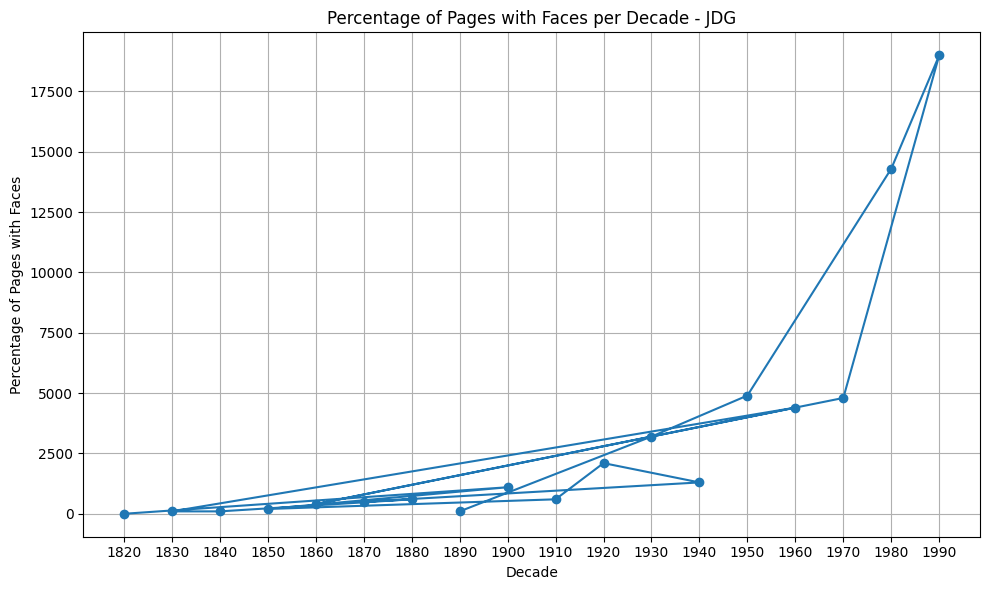

Error processing image ../data/newspapers/GDL/GDL-1972-12-04-a-p0003.jpg: image file is truncated (123 bytes not processed)
Error processing image ../data/newspapers/GDL/GDL-1987-03-24-a-p0007.jpg: image file is truncated (32 bytes not processed)


KeyboardInterrupt: 

In [86]:
main()